(150, 4)


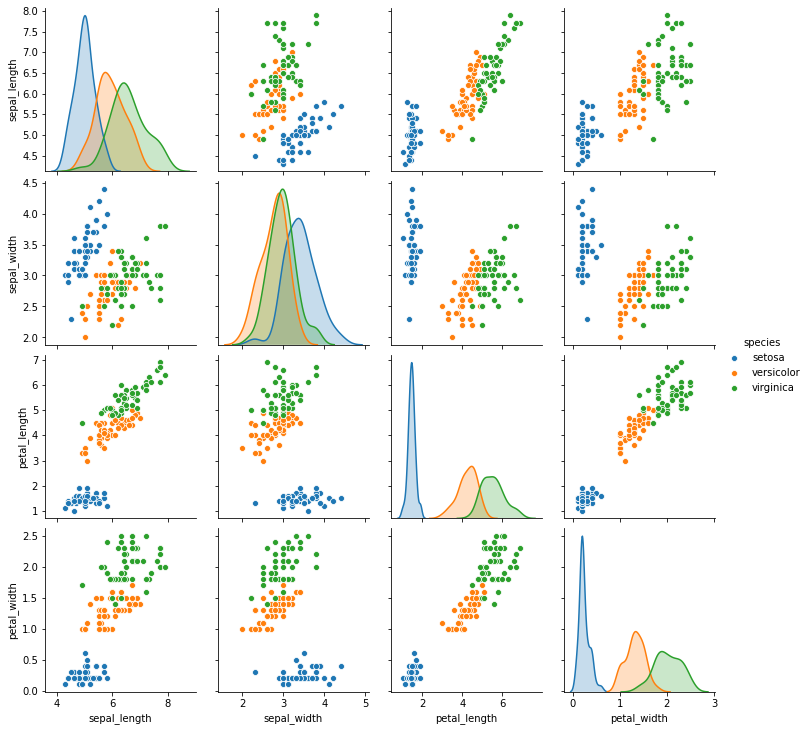

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

iris= pd.read_csv('../iris.cvs')
sb.pairplot(iris, hue = 'species') 
# print(iris_data)

#copy data with no labels
iris_data = iris.drop(['species'], axis=1, inplace = False)
# print(iris_data)

data = iris_data.values
print(data.shape)

Matriz de covariância K:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]



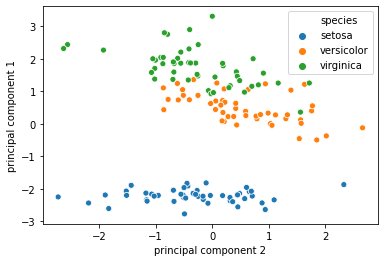

In [3]:
#Normalização dos dados
x = StandardScaler().fit_transform(data)

K = np.cov(x.T)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalues, eigenvectors = np.linalg.eig(K)

#sorting the values decreasing order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Changing to the new base
principal_comp = []
for eigenvectorT in (eigenvectors.T):
    principal_comp.append(x.dot(eigenvectorT))
    
principal_comp = np.array(principal_comp)
# print(principal_comp.shape)
# Data = pd.DataFrame(data = principal_comp.T, columns=['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
# Data = pd.concat([Data, iris['species']], axis = 1)

# sb.pairplot(Data, hue = 'species')

plt.show()
Data_2D = pd.DataFrame(data = principal_comp[:2].T, columns=['principal component 1', 'principal component 2'])
Data_2D = pd.concat([Data_2D, iris['species']], axis = 1)
# sb.pairplot(Data_2D, hue = 'species')
sb.scatterplot(Data_2D['principal component 2'],Data_2D['principal component 1'], hue = Data_2D['species'])
plt.show()

## Exemplo usando a biblioteca:

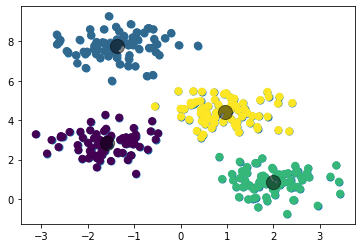

In [44]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
# print(X.shape)
# print(y_true.shape)
# print((X[:, 0]))
kms = KMeans(4)

kms.fit(X)
y_kms = kms.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kms, s=50, cmap='viridis')

centers = kms.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

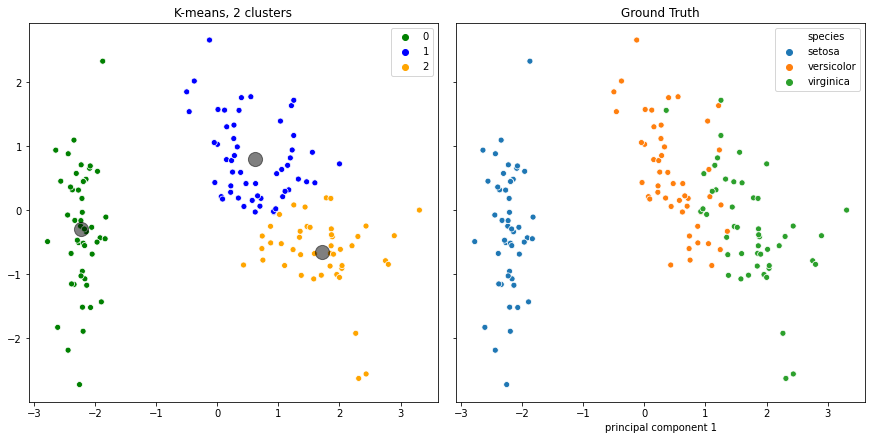

In [64]:
fig, ax = plt.subplots(1, 2,figsize=(6*2,6), sharex=True, sharey=True,constrained_layout=True)

X = Data_2D.iloc[:, 0:2].values
# print(X)
kms3 = KMeans(n_clusters=3)
kms3.fit(X)
cluster = kms3.predict(X)
sb.scatterplot(X[:, 0], X[:, 1], hue=cluster,ax = ax[0], palette= ['green', 'blue', 'orange' ])

centers = kms3.cluster_centers_
# print(cluster.shape)
ax[0].set_title("K-means, 2 clusters")
ax[0].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
ax[1].set_title("Ground Truth")
sb.scatterplot(Data_2D['principal component 1'],Data_2D['principal component 2'], ax = ax[1], hue = Data_2D['species'])
plt.show()

In [43]:
y_true = np.copy(Data_2D['species'])
y_true[y_true=='versicolor']= 0
y_true[y_true=='setosa']= 1
y_true[y_true=='virginica']= 2
y_true = np.array(y_true, dtype= 'int64')
confusion_matrix(y_true, cluster)

array([[39,  0, 11],
       [ 0, 50,  0],
       [14,  0, 36]])

Created cortex layer with shape: (100, 100, 28, 28) 

Trained epoch


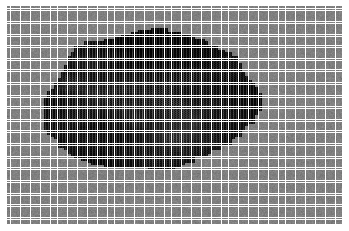

In [42]:
class SOM:
    def __init__(self, input_size=28, dim=(100,100
                                            []), radius=2, alpha = 0.05, epochs = 1):
        self.dim = dim
        self.input_size = input_size
        self.radius = int(radius)
        self.alpha = float(alpha)
        self.epochs = int(epochs)
        self.cortex = np.random.rand(self.dim[0], self.dim[1], self.input_size, self.input_size)
        self.cortex = np.reshape(self.cortex, (self.dim[0], self.dim[1], self.input_size, self.input_size))
        print("Created cortex layer with shape: %s \n" %(str(self.cortex.shape)))

    def train(self, x_train):
        point = [-1,-1]
        for vector in x_train:
            min_dist = np.Infinity
            for i in range(self.dim[0]):
                for j in range(self.dim[1]):
                    dist = np.sqrt(np.sum((vector.reshape(-1, self.input_size) - self.cortex[i][j]) ** 2))
                    if dist < min_dist:
                        min_dist = dist
                        point = [i, j]
            self.update_weights(point, vector)
        print('Trained epoch')
        
    def update_weights(self, point, vector):
        def isValidPoint(point):
            if point[0] < 0 or point[0] >= self.dim[0]:
                return False
            elif point[1] < 0 or point[1] >= self.dim[1]:
                return False
            return True
        
        x_diff = -self.radius
        
        # update the weights in the points inside the radius
        while x_diff <= self.radius:
            y_diff = -self.radius
            
            while y_diff <= self.radius:
                if isValidPoint([point[0]+x_diff, point[1]+y_diff]):
                    # update weights
                    delta = vector.reshape(-1, self.input_size) - self.cortex[point[0]+x_diff][point[1]+y_diff]
                    self.cortex[point[0]+x_diff][point[1]+y_diff] += self.alpha * delta
                y_diff += 1
            x_diff += 1
            
    def show(self):
        fig, axis = plt.subplots(self.dim[0], self.dim[1])
        plt.axis('off')
        plt.xticks(color='w')
        plt.yticks(color='w')

        for i in range(self.dim[0]):
            for j in range(self.dim[1]):
                axis[i, j].imshow(self.cortex[i][j], aspect='auto', cmap='gray')

        i=0
        for row in axis:
            j=0
            for columns in row:
                columns.imshow(self.cortex[i][j], aspect = 'auto', cmap='gray')
                columns.axis('off')
                j += 1
            i += 1
        plt.show()

# generating the SOM network
mnist_SOM = SOM()
mnist_SOM.train(x_treino)
mnist_SOM.show()

# K-nn


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


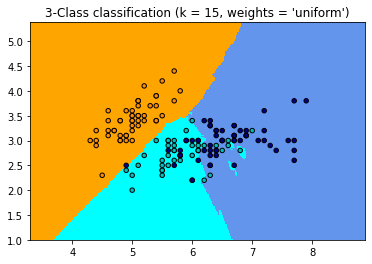

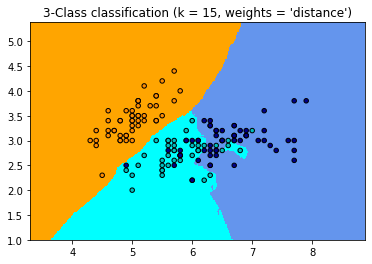

150


In [71]:

from matplotlib.colors import ListedColormap

n_neighbors = 15

# import some data to play with
from sklearn import neighbors, datasets
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
print(y)

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
print(len(y))